In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sn

In [2]:
df = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IBM_Student Alcohol Consumption\student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# To convert Categorical variables into numeric form

df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason'])

In [4]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,1,0,4,4,0,2,2,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,1,1,1,2,...,5,3,3,1,1,3,4,5,5,6
2,0,15,1,0,1,1,1,0,1,2,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,1,1,4,2,0,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,1,1,3,3,1,1,2,...,4,3,2,1,2,5,4,6,10,10


In [5]:
X = df.iloc[:,:28].values
X.shape

(395, 28)

In [6]:
y = df.iloc[:,-1].values
y.shape

(395,)

In [8]:
# Splitting data into training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
# Feature scaling or normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.07222193, -0.51393668,  0.54321448, ..., -0.67465822,
         0.61361953,  0.58118697],
       [-0.93264274,  1.89800379,  0.54321448, ..., -0.67465822,
        -0.27994624, -0.43068676],
       [ 1.07222193, -1.31791684,  0.54321448, ..., -0.43170437,
        -0.27994624, -0.17771833],
       ...,
       [-0.93264274, -1.31791684, -1.8408935 , ..., -0.43170437,
        -0.87565674, -1.18959206],
       [ 1.07222193, -0.51393668,  0.54321448, ...,  0.54011099,
         0.01790902, -0.43068676],
       [ 1.07222193, -0.51393668, -1.8408935 , ...,  0.17568023,
         1.20933003,  1.34009226]])

In [10]:
# Training the KNN model with K = 5 for first instance

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Predictions of the KNN model with K = 5 for first instance

y_pred = classifier.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

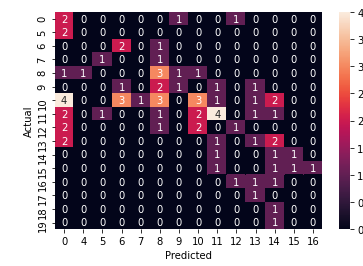

In [12]:
# Evaluating the performance of our KNN classifier model using a confusion matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames =  ['Actual'], colnames = ['Predicted'])
sn.heatmap(confusion_matrix, annot = True)

In [13]:
# Training the classifier to find the best value of K

from sklearn import metrics
scores = {}
scores_list = []
for k in range(1,30):
  classifier1 = KNeighborsClassifier(n_neighbors = k)
  classifier1.fit(X_train, y_train)
  y_pred1 = classifier1.predict(X_test)
  temp = metrics.accuracy_score(y_test, y_pred1)
  scores[k] = temp
  scores_list.append(temp)

Text(0, 0.5, 'Testing Accuracy')

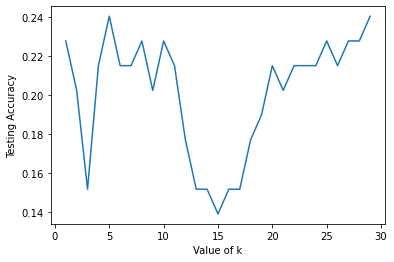

In [14]:
k_range = range(1,30)
plt.plot(k_range, scores_list)
plt.xlabel('Value of k')
plt.ylabel('Testing Accuracy')

In [15]:
acc = accuracy_score(y_test, y_pred)
acc

0.24050632911392406

In [16]:
classifier.score(X_test, y_test)

0.24050632911392406